I need to figure out how to run MCMC with constraints. 

In [1]:
library(sf)
library(ggplot2)
library(tidyverse)
library(tibble)
library(magrittr)
library(redist)
library(sp)
library(spData)
library(spdep)
library(igraph)

ff_2015_file <- "C:/Users/madie/OneDrive/data/pre-redist/VA_precinct_2015_fairfax/VA_precinct_2015_fairfax.shp"
df <- st_read(ff_2015_file)

Linking to GEOS 3.8.0, GDAL 3.0.4, PROJ 6.3.1

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0
v purrr   0.3.4     

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'magrittr'


The following object is masked from 'package:purrr':

    set_names


The following object is masked from 'package:tidyr':

    extract



Attaching package: 'igraph'


The following objects are masked from 'package:dplyr':

    as_data_frame, groups, union


The following objects are masked from 'package:purrr':

    compose, simplify


The following object is masked from 'package:tidyr':

    crossing


The following object is masked from 'package:tibble':

    a

Reading layer `VA_precinct_2015_fairfax' from data source `C:\Users\madie\OneDrive\data\pre-redist\VA_precinct_2015_fairfax\VA_precinct_2015_fairfax.shp' using driver `ESRI Shapefile'
Simple feature collection with 253 features and 14 fields
geometry type:  POLYGON
dimension:      XYZ
bbox:           xmin: 11757190 ymin: 6905741 xmax: 11899000 ymax: 7070364
z_range:        zmin: 0 zmax: 0
projected CRS:  NAD83 / Virginia North (ftUS)


Saving 6.67 x 6.67 in image



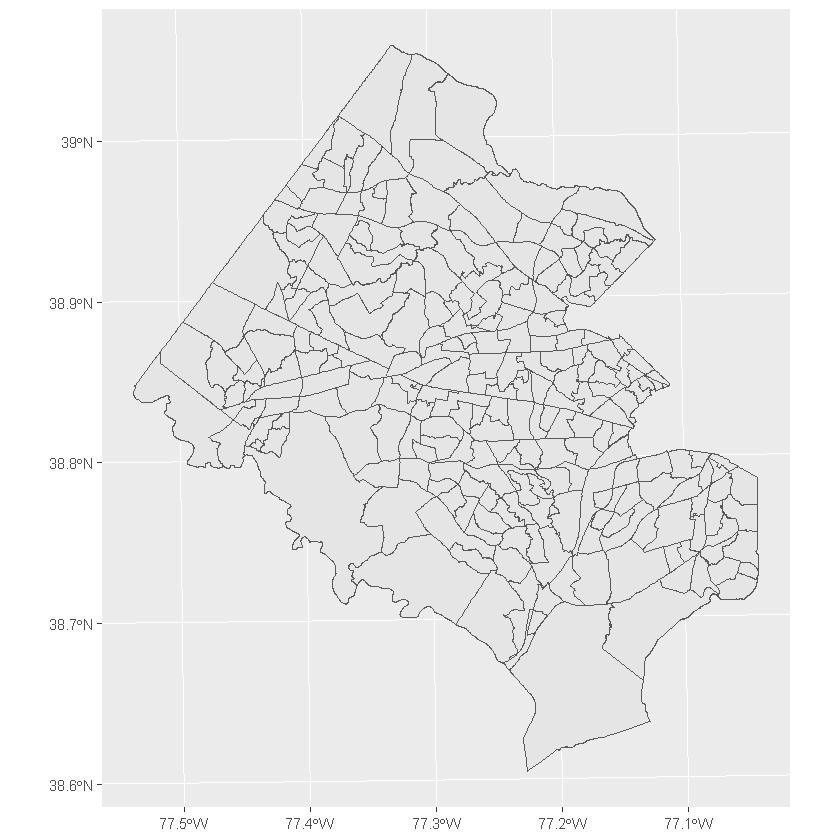

In [2]:
# plot the precincts!
plot <- ggplot(data = df) +
    geom_sf()
ggsave("ff.png")
plot

In [3]:
# generate adjacency list
adjlist <- redist.adjacency(df)

In [4]:
# run a single chain of mcmc
alg_mcmc <- redist.mcmc(adjobj = adjlist,
                        popvec = df$pop,
                        ndists = 10,
                        nsims = 10000,
                        maxiterrsg = 10000)


redist.mcmc(): Automated Redistricting Simulation Using
         Markov Chain Monte Carlo

Preprocessing data.


Using redist.rsg() to generate starting values.

10 percent done.
Metropolis acceptance ratio: 0.95996

20 percent done.
Metropolis acceptance ratio: 0.952476

30 percent done.
Metropolis acceptance ratio: 0.951984

40 percent done.
Metropolis acceptance ratio: 0.950488

50 percent done.
Metropolis acceptance ratio: 0.95239

60 percent done.
Metropolis acceptance ratio: 0.952825

70 percent done.
Metropolis acceptance ratio: 0.953422

80 percent done.
Metropolis acceptance ratio: 0.954369

90 percent done.
Metropolis acceptance ratio: 0.954328

100 percent done.
Metropolis acceptance ratio: 0.953395



In [5]:
# generate 10 random colors that are distinct so that the different districts are distinguishable. 
library(randomcoloR)
colors <- distinctColorPalette(k=10)

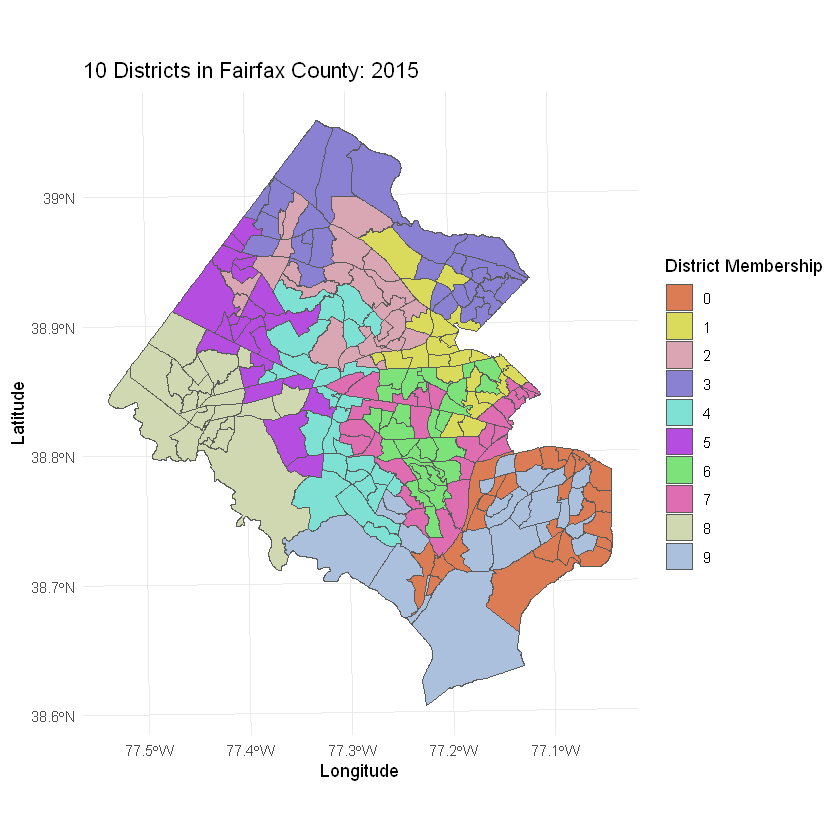

In [6]:
# Let's plot this!
cds <- alg_mcmc$partitions[,1]
plot_2 <- redist.map(shp=df, 
        district_membership=cds, 
        centroids=FALSE, 
        edges=FALSE,
        title="10 Districts in Fairfax County: 2015") +
        theme(legend.position="right") +
        scale_fill_manual(values = colors)
        # geom_sf_label(aes(label = cds))
#ggsave("fairfax_10.png")
plot_2

In [7]:
## -----------------------------------------------
## Run mcmc algorithm - hard population constraint
## (reject any sample where population parity > 20%)
## -----------------------------------------------
mcmc.out <- redist.mcmc(adjobj = adjlist,
                        popvec = df$pop,
                        nsims = 10000,
                        popcons = .2,
                        ndists = 10,
                        maxiterrsg = 10000)


redist.mcmc(): Automated Redistricting Simulation Using
         Markov Chain Monte Carlo

Preprocessing data.


Using redist.rsg() to generate starting values.

10 percent done.
Metropolis acceptance ratio: 0.956957

20 percent done.
Metropolis acceptance ratio: 0.953977

30 percent done.
Metropolis acceptance ratio: 0.957653

40 percent done.
Metropolis acceptance ratio: 0.95899

50 percent done.
Metropolis acceptance ratio: 0.956591

60 percent done.
Metropolis acceptance ratio: 0.958493

70 percent done.
Metropolis acceptance ratio: 0.957708

80 percent done.
Metropolis acceptance ratio: 0.958745

90 percent done.
Metropolis acceptance ratio: 0.958218

100 percent done.
Metropolis acceptance ratio: 0.958296



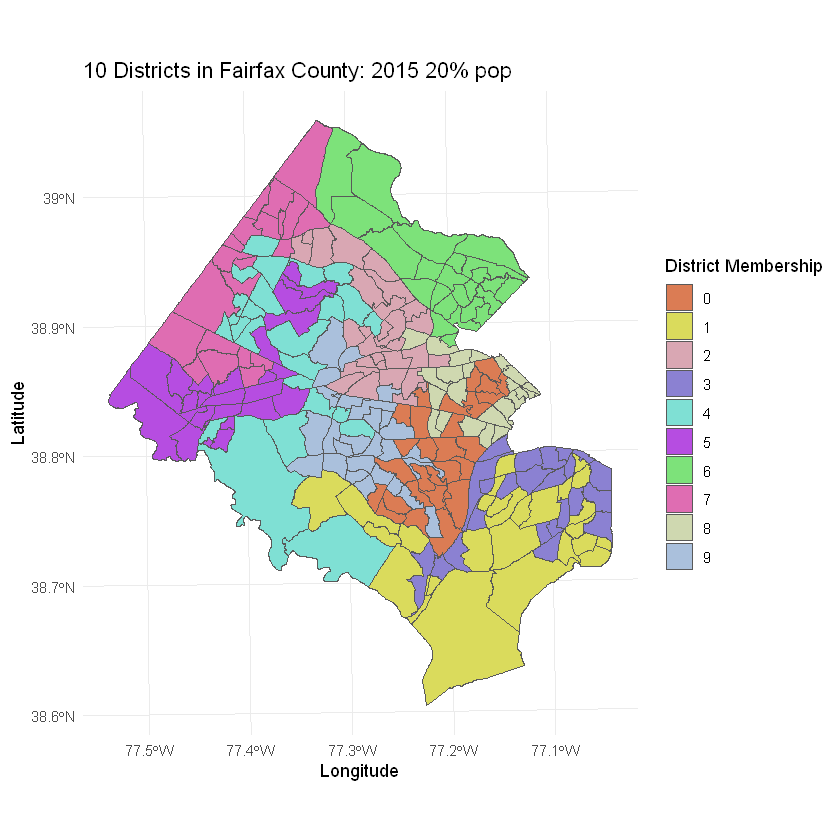

In [8]:
cds <- mcmc.out$partitions[,1]
plot_3 <- redist.map(shp=df, 
        district_membership=cds, 
        centroids=FALSE, 
        edges=FALSE,
        title="10 Districts in Fairfax County: 2015 20% pop") +
        theme(legend.position="right") +
        scale_fill_manual(values = colors)
        # geom_sf_label(aes(label = cds))
#ggsave("fairfax_10.png")
plot_3

In [9]:
## ---------------------------------------------------------------------
## Run mcmc algorithm - draws from gibbs defined by distance from parity
## (Run with no tempering)
## ---------------------------------------------------------------------
mcmc.out.gb <- redist.mcmc(adjobj = adjlist,
                           popvec = df$pop,
                           ndists = 10,
                           nsims = 10000,
                           constraint = "population",
                           constraintweights = 5.4,
                           maxiterrsg = 10000)
## Reweight draws back to the uniform distribution
mcmc.out.gb <- redist.ipw(mcmc.out.gb, targetpop = .2)


redist.mcmc(): Automated Redistricting Simulation Using
         Markov Chain Monte Carlo

Preprocessing data.


Using redist.rsg() to generate starting values.

10 percent done.
Metropolis acceptance ratio: 0.8999

20 percent done.
Metropolis acceptance ratio: 0.890445

30 percent done.
Metropolis acceptance ratio: 0.896299

40 percent done.
Metropolis acceptance ratio: 0.897724

50 percent done.
Metropolis acceptance ratio: 0.895379

60 percent done.
Metropolis acceptance ratio: 0.897483

70 percent done.
Metropolis acceptance ratio: 0.895271

80 percent done.
Metropolis acceptance ratio: 0.893362

90 percent done.
Metropolis acceptance ratio: 0.893877

100 percent done.
Metropolis acceptance ratio: 0.894589



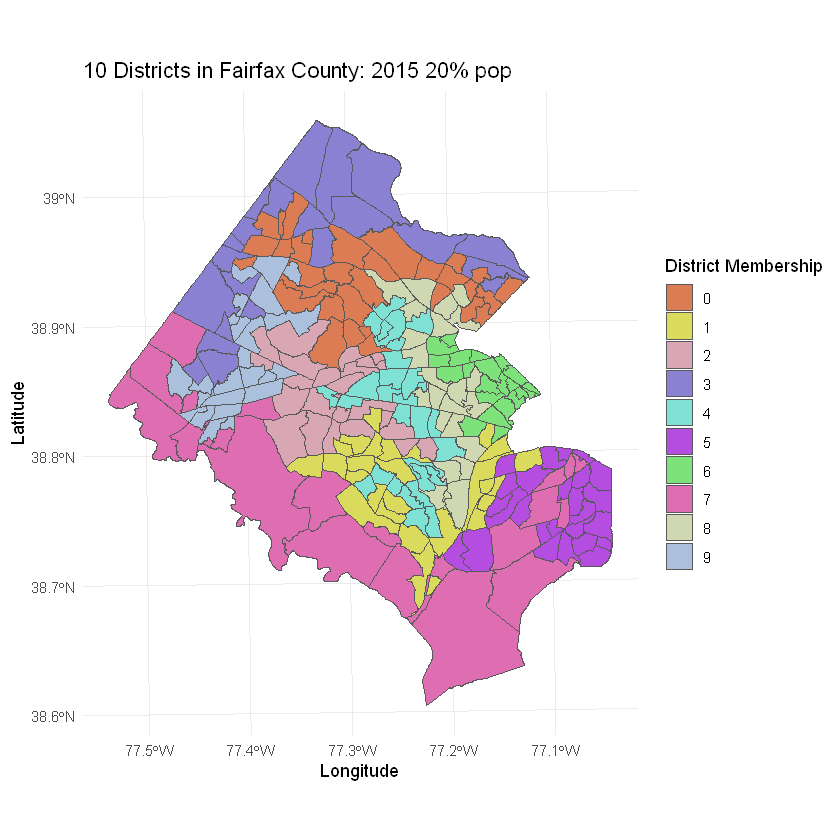

In [10]:
cds <- mcmc.out.gb$partitions[,1]
plot_4 <- redist.map(shp=df, 
        district_membership=cds, 
        centroids=FALSE, 
        edges=FALSE,
        title="10 Districts in Fairfax County: 2015 20% pop") +
        theme(legend.position="right") +
        scale_fill_manual(values = colors)
        # geom_sf_label(aes(label = cds))
#ggsave("fairfax_10.png")
plot_4

In [11]:
## ---------------------------------------------------------------------
## Run mcmc algorithm - draws from gibbs defined by distance from parity
## (Run with simulated tempering, betas power law sequence of length 10
## from 0 to 1)
## Also including optional beta weights, to upweight prob of transitions
## to colder temperatures
## ---------------------------------------------------------------------
betaweights <- rep(NA, 10); for(i in 1:10){betaweights[i] <- 2^i}
mcmc.out.st <- redist.mcmc(adjobj = adjlist,
                           popvec = df$pop,
                           ndists = 10,
                           nsims = 10000,
                           constraint = "population",
                           constraintweights = 5.4,
                           temper = TRUE,
                           betaweights = betaweights)
mcmc.out.st <- redist.ipw(mcmc.out.st, targetpop = .2)


redist.mcmc(): Automated Redistricting Simulation Using
         Markov Chain Monte Carlo

Preprocessing data.


Using redist.rsg() to generate starting values.

10 percent done.
Metropolis acceptance ratio: 0.912913

20 percent done.
Metropolis acceptance ratio: 0.917459

30 percent done.
Metropolis acceptance ratio: 0.921641

40 percent done.
Metropolis acceptance ratio: 0.923481

50 percent done.
Metropolis acceptance ratio: 0.926785

60 percent done.
Metropolis acceptance ratio: 0.928988

70 percent done.
Metropolis acceptance ratio: 0.927847

80 percent done.
Metropolis acceptance ratio: 0.926491

90 percent done.
Metropolis acceptance ratio: 0.926436

100 percent done.
Metropolis acceptance ratio: 0.927293



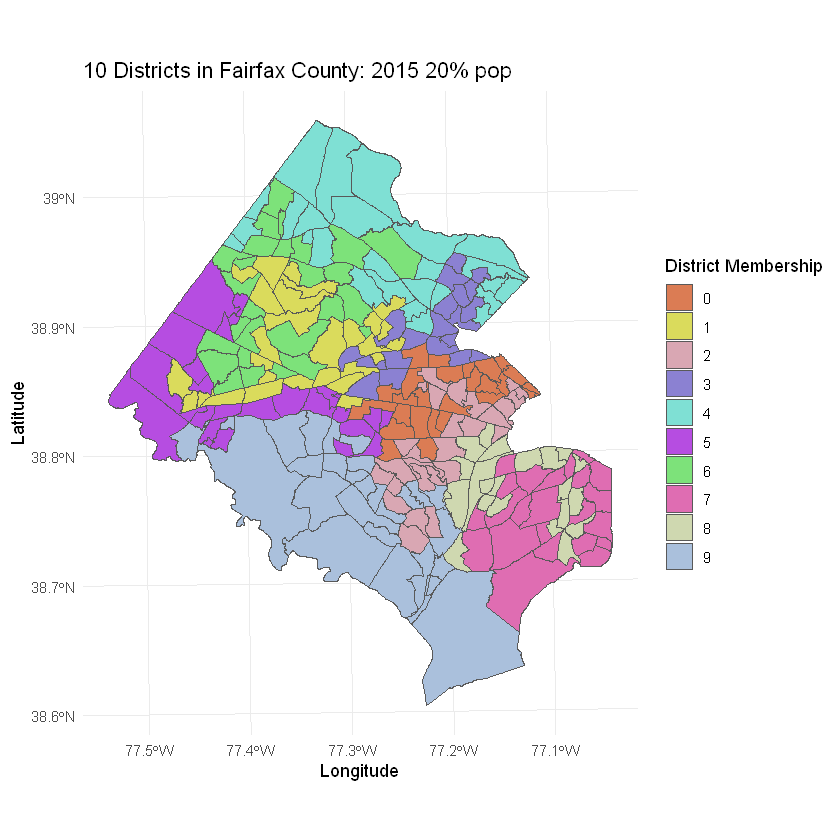

In [12]:
cds <- mcmc.out.st$partitions[,1]
plot_5 <- redist.map(shp=df, 
        district_membership=cds, 
        centroids=FALSE, 
        edges=FALSE,
        title="10 Districts in Fairfax County: 2015 20% pop") +
        theme(legend.position="right") +
        scale_fill_manual(values = colors)
        # geom_sf_label(aes(label = cds))
#ggsave("fairfax_10.png")
plot_5

In [13]:
# trying to figure out how to calculate that dang distancemat
centroid <- st_centroid(df$geometry)

In [14]:
distancemat <- st_distance(centroid, centroid)

In [ ]:
distancemat

In [ ]:
## ----------------------------------------------------------
## Constrain on population and compactness with tempering,
## weight on population = 5.4 while weight on compactness = 3
## Also specifying argument for ssdmat, the distance matrix
## ----------------------------------------------------------

mcmc.out.st.multiple <- redist.mcmc(adjobj = adjlist,
                                    popvec = df$pop,
                                    ndists = 10,
                                    nsims = 10000,
                                    constraint = c("population", "compact"),
                                    constraintweights = c(5.4, 3),
                                    ssdmat = distancemat,
                                    temper = TRUE)
mcmc.out.st <- redist.ipw(mcmc.out.st.multiple, targetpop = .2)